In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

excel_file = "cancer_patient_data_sets.csv"
sheet_name = "cancer_patient_data_sets"
df = pd.read_csv(excel_file)      # df-dataframe

In [2]:
# Define a simple function to convert classes
def convert_to_binary(class_label):
    if class_label in ['High', 'Medium']:  # or any logic you choose
        return 1  # present
    else:
        return 0  # absent

# Apply the function to your target column
df['cancer_presence'] = df['Level'].apply(convert_to_binary)

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,cancer_presence
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,1
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,1
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,1


In [4]:
df = df.replace({'Level':{'Low': 0, 'Medium': 1, 'High': 2}})
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,cancer_presence
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,0,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,1,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,2,1
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,2,1


In [5]:
# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()
# df['Gender']=le.fit_transform(df['Gender'])
# df['Air Pollution']=le.fit_transform(df['Air Pollution'])
# df['Alcohol use']=le.fit_transform(df['Alcohol use'])
# df['Dust Allergy']=le.fit_transform(df['Dust Allergy'])
# df['OccuPational Hazards']=le.fit_transform(df['OccuPational Hazards'])
# df['Genetic Risk']=le.fit_transform(df['Genetic Risk'])
# df['chronic Lung Disease']=le.fit_transform(df['chronic Lung Disease'])
# df['Balanced Diet']=le.fit_transform(df['Balanced Diet'])
# df['Obesity']=le.fit_transform(df['Obesity'])
# df['Smoking']=le.fit_transform(df['Smoking'])
# df['Passive Smoker']=le.fit_transform(df['Passive Smoker'])
# df['Chest Pain']=le.fit_transform(df['Chest Pain'])
# df['Cpughing of Blood']=le.fit_transform(df['Coughing of Blood'])
# df['Fatigue']=le.fit_transform(df['Fatigue'])
# df['Weight Loss']=le.fit_transform(df['Weight Loss'])
# df['Shortness of Breath']=le.fit_transform(df['Shortness of Breath'])
# df['Wheezing']=le.fit_transform(df['Wheezing'])
# df['Swallowing Difficulty']=le.fit_transform(df['Swallowing Difficulty'])
# df['Clubbing of Finger Nails']=le.fit_transform(df['Clubbing of Finger Nails'])
# df['Frequent Cold']=le.fit_transform(df['Frequent Cold'])
# df['Dry Cough']=le.fit_transform(df['Dry Cough'])
# df['Snoring']=le.fit_transform(df['Snoring'])

# df.head()

In [6]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
cancer_presence             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'cancer_presence'],
      dtype='object')

In [9]:
df.drop(['index', 'Patient Id', 'Level'], inplace=True, axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,cancer_presence
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


Correlation Matrix

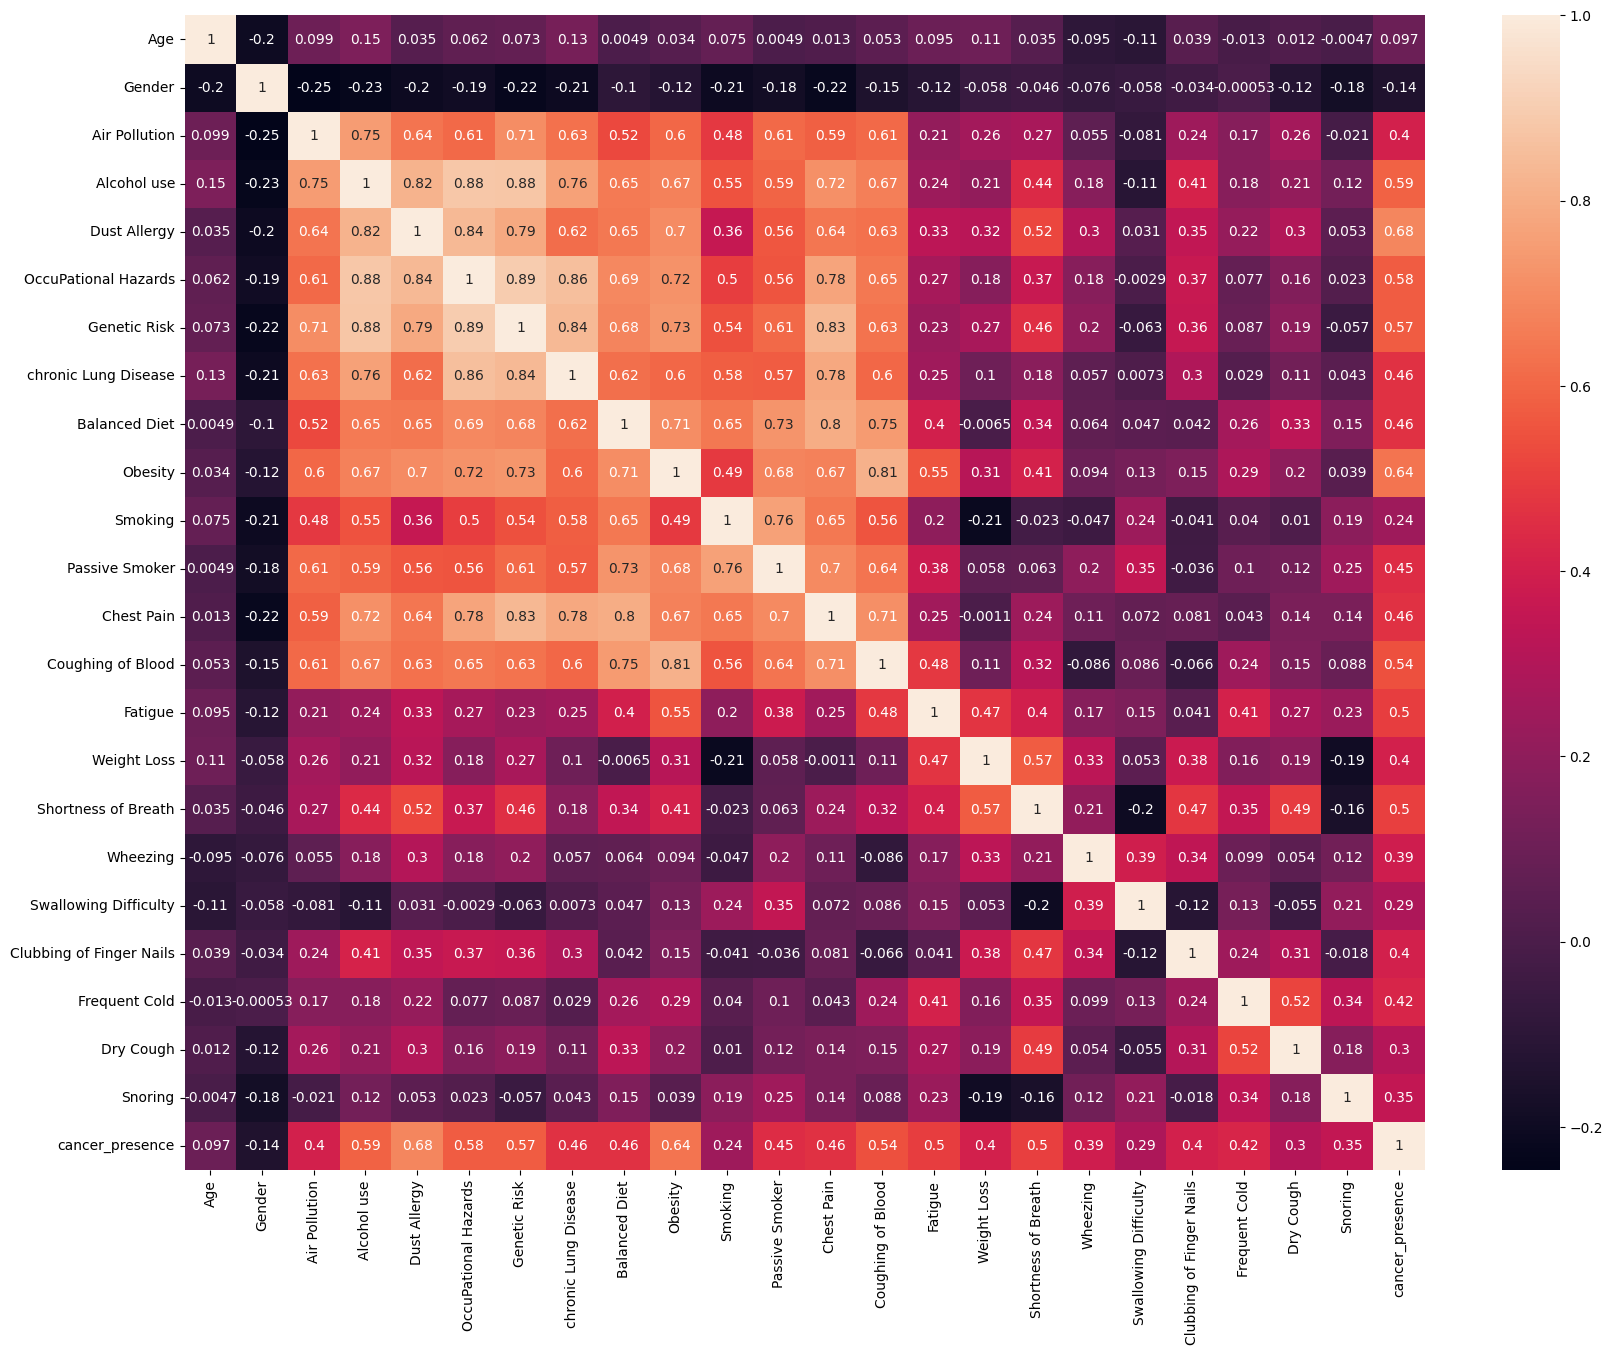

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
correlationmatrix = df.copy()
fig = plt.figure(figsize=(20,15))
sns.heatmap(correlationmatrix.corr(), annot = True)
plt.show()

In [11]:
#correlation of 'Alcohol use' with 'Air Pollution'
df['Alcohol use'].corr(df['Air Pollution'])

0.7472926058498689

In [12]:
#correlation of 'Smoking' with 'Passive Smoker'
df['Smoking'].corr(df['Passive Smoker'])

0.7616215035339875

<Axes: >

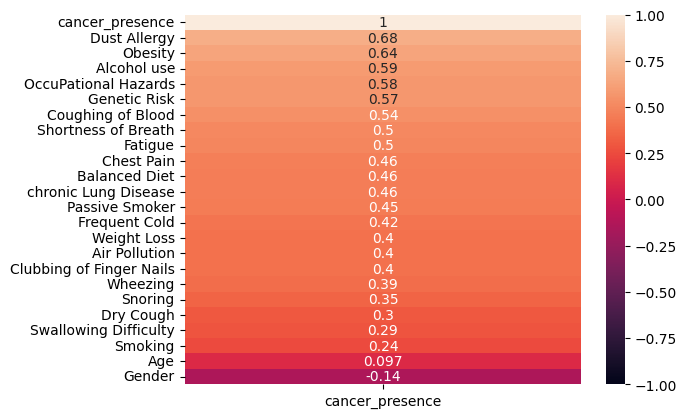

In [13]:
sns.heatmap(df.corr()[['cancer_presence']].sort_values(by='cancer_presence', ascending=False), vmin=-1, vmax=1, annot=True)

In [14]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,cancer_presence
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.697000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.459785
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [16]:
gender_count = df.groupby('Gender')[['cancer_presence']].mean()
gender_count = gender_count.sort_values(by=['cancer_presence'], ascending=False)
gender_count

,cancer_presence
Gender,
1,0.750836
2,0.616915


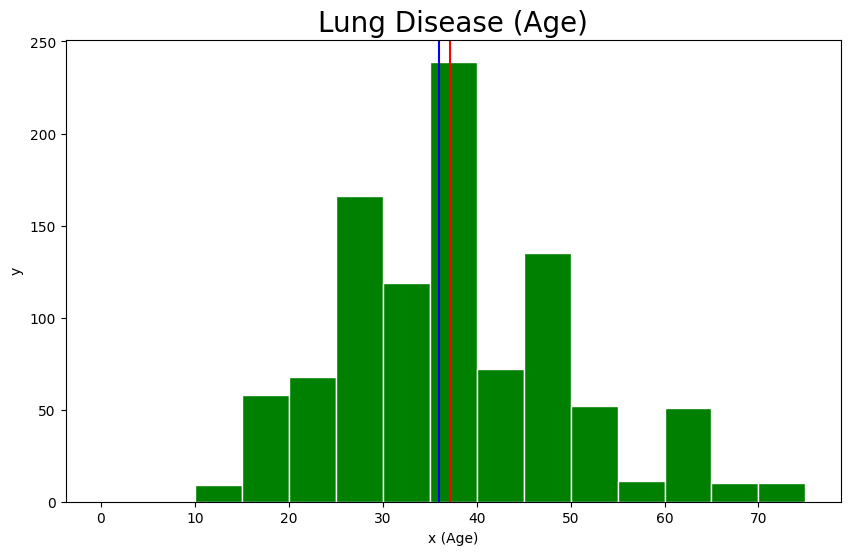

In [17]:
plt.figure(figsize=(10,6))
plt.title("Lung Disease (Age)",fontsize=20)
plt.xlabel('x (Age)')
plt.ylabel('y')
plt.hist(df.Age, bins = np.arange(0,80,5), color='green', edgecolor = 'white')

plt.axvline(x = df['Age'].mean(), color = 'red')
plt.axvline(x = df['Age'].median(), color = 'blue')


Kernel Density Estimate (KDE) plot

<Figure size 640x480 with 0 Axes>

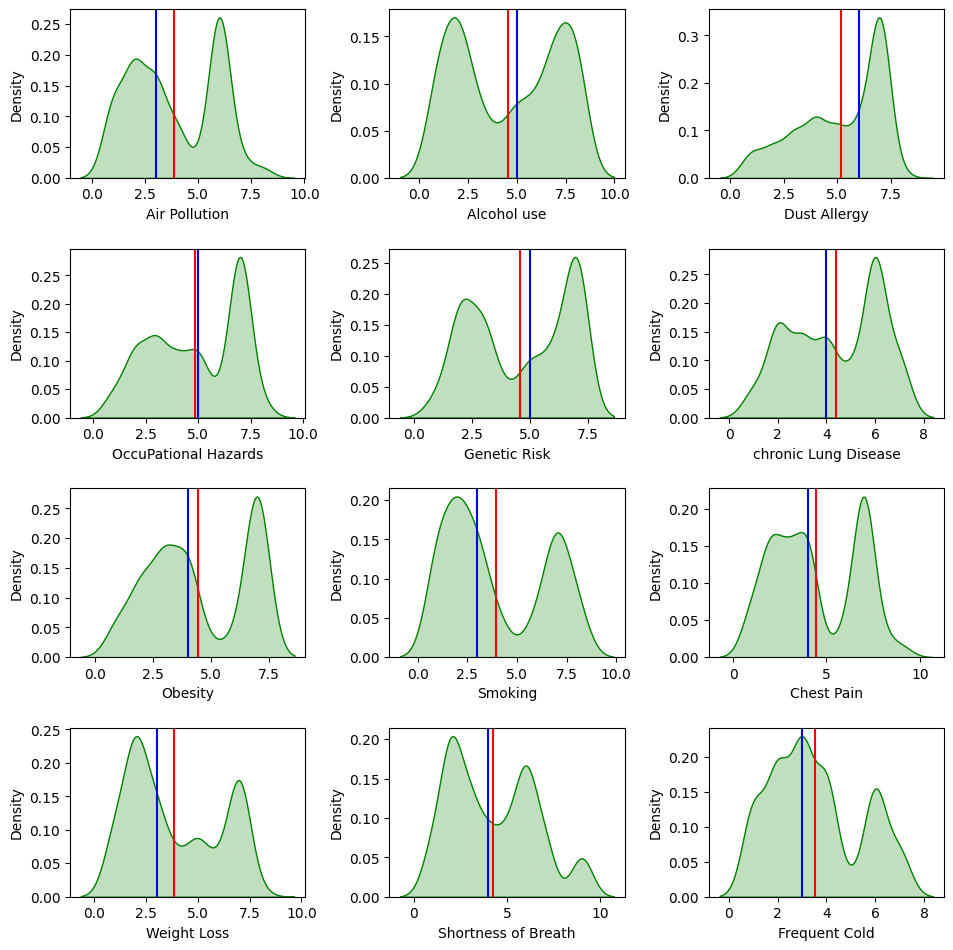

In [18]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset
# KDE represents the data using a continuous probability density curve in one or more dimensions

fig = plt.figure()
fig, axes = plt.subplots(4, 3, figsize= (10, 10))
plt.tight_layout(pad= 3)

plt1 = sns.kdeplot(data=df, x='Air Pollution',color='green',fill=True, ax=axes[0,0])
plt2 = sns.kdeplot(data=df, x='Alcohol use',color='green',fill=True, ax=axes[0,1])
plt3 = sns.kdeplot(data=df, x='Dust Allergy',color='green',fill=True, ax=axes[0,2])
plt4 = sns.kdeplot(data=df, x='OccuPational Hazards',color='green',fill=True, ax=axes[1,0])
plt5 = sns.kdeplot(data=df, x='Genetic Risk',color='green',fill=True, ax=axes[1,1])
plt6 = sns.kdeplot(data=df, x='chronic Lung Disease',color='green',fill=True, ax=axes[1,2])
plt7 = sns.kdeplot(data=df, x='Obesity',color='green',fill=True, ax=axes[2,0])
plt8 = sns.kdeplot(data=df, x='Smoking',color='green',fill=True, ax=axes[2,1])
plt9 = sns.kdeplot(data=df, x='Chest Pain',color='green',fill=True, ax=axes[2,2])
plt10 = sns.kdeplot(data=df, x='Weight Loss',color='green',fill=True, ax=axes[3,0])
plt11 = sns.kdeplot(data=df, x='Shortness of Breath',color='green',fill=True, ax=axes[3,1])
plt12 = sns.kdeplot(data=df, x='Frequent Cold',color='green',fill=True, ax=axes[3,2])

plt1.axvline(x = df['Air Pollution'].mean(), color = 'red')
plt1.axvline(x = df['Air Pollution'].median(), color = 'blue')
plt2.axvline(x = df['Alcohol use'].mean(), color = 'red')
plt2.axvline(x = df['Alcohol use'].median(), color = 'blue')
plt3.axvline(x = df['Dust Allergy'].mean(), color = 'red')
plt3.axvline(x = df['Dust Allergy'].median(), color = 'blue')
plt4.axvline(x = df['OccuPational Hazards'].mean(), color = 'red')
plt4.axvline(x = df['OccuPational Hazards'].median(), color = 'blue')
plt5.axvline(x = df['Genetic Risk'].mean(), color = 'red')
plt5.axvline(x = df['Genetic Risk'].median(), color = 'blue')
plt6.axvline(x = df['chronic Lung Disease'].mean(), color = 'red')
plt6.axvline(x = df['chronic Lung Disease'].median(), color = 'blue')
plt7.axvline(x = df['Obesity'].mean(), color = 'red')
plt7.axvline(x = df['Obesity'].median(), color = 'blue')
plt8.axvline(x = df['Smoking'].mean(), color = 'red')
plt8.axvline(x = df['Smoking'].median(), color = 'blue')
plt9.axvline(x = df['Chest Pain'].mean(), color = 'red')
plt9.axvline(x = df['Chest Pain'].median(), color = 'blue')
plt10.axvline(x = df['Weight Loss'].mean(), color = 'red')
plt10.axvline(x = df['Weight Loss'].median(), color = 'blue')
plt11.axvline(x = df['Shortness of Breath'].mean(), color = 'red')
plt11.axvline(x = df['Shortness of Breath'].median(), color = 'blue')
plt12.axvline(x = df['Frequent Cold'].mean(), color = 'red')
plt12.axvline(x = df['Frequent Cold'].median(), color = 'blue')

In [19]:
X = df.iloc[:,:-1].values    #selects all rows and all columns except the last one in the DataFrame df
y = df.iloc[:,-1].values     #selects all rows and only the last column in the DataFrame df

In [20]:
# Use numpy's unique function to get the count of each unique class
unique_classes, class_counts = np.unique(y, return_counts=True)
# Manually define class names (replace with your actual class names)
class_names = ['Absent', 'Present']
# Print the results
for class_label, count, class_name in zip(unique_classes, class_counts, class_names):
    print(f"Class {class_label} ({class_name}): {count} occurrences")

Class 0 (Absent): 303 occurrences
Class 1 (Present): 697 occurrences


In [21]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have loaded your dataset into X (features) and y (target)
# X should contain your features, and y should contain your target variable

# Example:
# X = your_features
# y = your_target

# Check the class distribution before SMOTE
print("Before SMOTE:", Counter(y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({1: 697, 0: 303})
After SMOTE: Counter({0: 697, 1: 697})


Training and Testing the dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.80)

In [23]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [24]:
X_train

array([[24,  2,  3, ...,  1,  1,  1],
       [35,  2,  2, ...,  1,  2,  2],
       [44,  1,  2, ...,  3,  2,  3],
       ...,
       [62,  1,  6, ...,  4,  2,  3],
       [38,  2,  5, ...,  2,  4,  2],
       [47,  1,  6, ...,  6,  7,  2]], dtype=int64)

In [25]:
X_test

array([[35,  1,  1, ...,  1,  2,  4],
       [52,  1,  3, ...,  2,  3,  3],
       [55,  1,  3, ...,  4,  5,  2],
       ...,
       [45,  2,  1, ...,  4,  2,  5],
       [37,  2,  7, ...,  6,  7,  5],
       [27,  2,  3, ...,  2,  6,  2]], dtype=int64)

Random Forest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10, 
                            min_samples_split=4, 
                            min_samples_leaf=2, 
                            max_features='sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Random Forest): {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy (Random Forest): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



SVM Algorithm

In [27]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (SVM): {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy (SVM): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



XGBoost Algorithm

In [28]:
import xgboost as xgb

# Convert the data into DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes in the target variable
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'merror'  # Evaluation metric: multiclass classification error rate
}

# Train the XGBoost model
num_rounds = 100
xgboost_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgboost_model.predict(dtest)

# Convert the predictions to integers (required for metrics like accuracy_score)
y_pred = y_pred.astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



Naive Bayes Algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       138
           1       0.93      0.83      0.88       141

    accuracy                           0.88       279
   macro avg       0.89      0.88      0.88       279
weighted avg       0.89      0.88      0.88       279



Decision Tree Algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



Gradient Boosting Algorithm

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



SVC Algorithm

In [32]:
from sklearn.svm import SVC

# Initialize the Support Vector Classification model
svc_model = SVC(kernel='linear', C=1.0)  # You can choose different kernels and adjust the C parameter

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



Logistic Regression Algorithm

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# logistic_regression_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, penalty='11', solver='liblinear')
logistic_regression_model = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       141

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



10-fold Cross-validation

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Create a 10-fold cross-validation iterator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the scoring metrics you want to use
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform 10-fold cross-validation for each scoring metric
for metric in scoring_metrics:
    cross_val_results = cross_val_score(rf, X, y, cv=kf, scoring=metric)
    print(metric)
    print(cross_val_results)
    print(f"Cross-Validation {metric.capitalize()}: %0.2f (+/- %0.2f)" % (cross_val_results.mean(), cross_val_results.std() * 2))
    print()

accuracy
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-Validation Accuracy: 1.00 (+/- 0.00)

precision_macro
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-Validation Precision_macro: 1.00 (+/- 0.00)

recall_macro
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-Validation Recall_macro: 1.00 (+/- 0.00)

f1_macro
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-Validation F1_macro: 1.00 (+/- 0.00)



EXPLAINABLE AI USING SHAP METHOD

Feature Importance

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


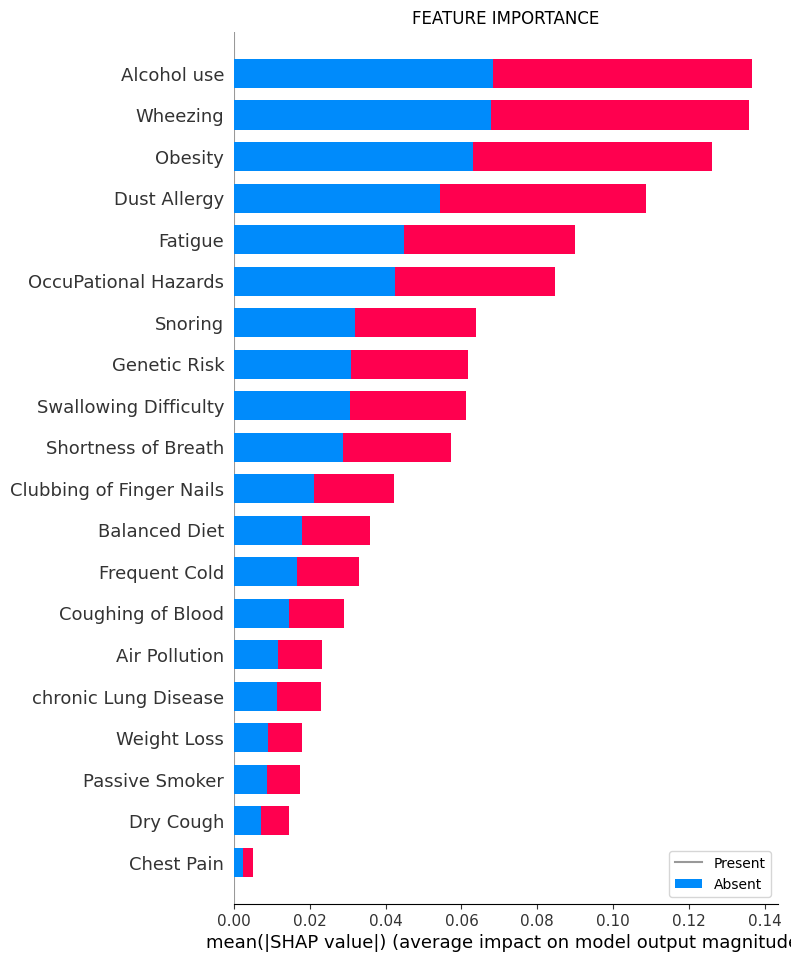

In [35]:
import shap

shap_explainer = shap.TreeExplainer(rf)
shap_values = shap_explainer.shap_values(X_test)

# Summary Plot
# If you want a force plot for a specific instance (replace 0 with the index of the instance you're interested in)
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

# If you want a bar plot of feature importance
shap.summary_plot(shap_values, X_test, feature_names=df.columns, plot_type="bar", show=False) # plot_type='bar' is supported for multi-output explanations!
plt.title("FEATURE IMPORTANCE")
plt.legend(["Present", "Absent"])  # Customize legend labels

In [36]:

# # Assuming you have an individual instance to explain
# instance_index = 0  # Change this to the index of the instance you want to explain
# instance = X_test[instance_index:instance_index+1, :]  # Use the NumPy array and make it 2D

# # Create an explanation for the instance
# class_index = 0  # Change this to the index of the class you want to explain
# explanation = shap_values[class_index][instance_index, :]

# # Visualize the decision plot for the specific instance
# shap.decision_plot(shap_explainer.expected_value[class_index], explanation, features=instance)

SHAP Interpretation for a Specific Class

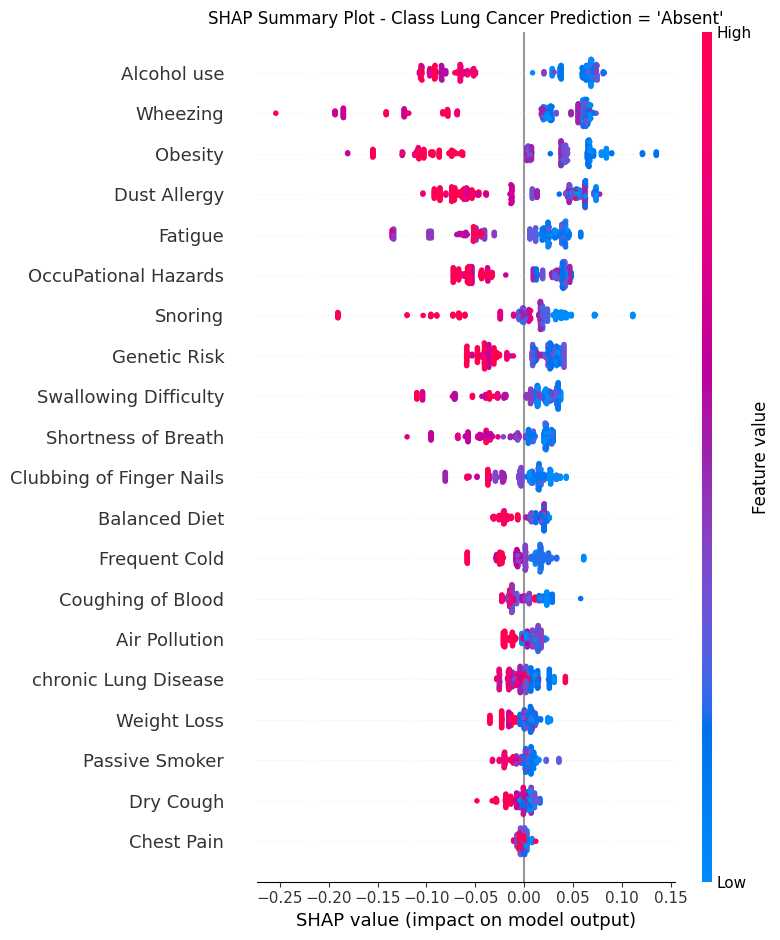

In [37]:
class_to_explain = 0 
plt.title("SHAP Summary Plot - Class Lung Cancer Prediction = 'Absent'")
shap.summary_plot(shap_values[class_to_explain], X_test, feature_names=df.columns)


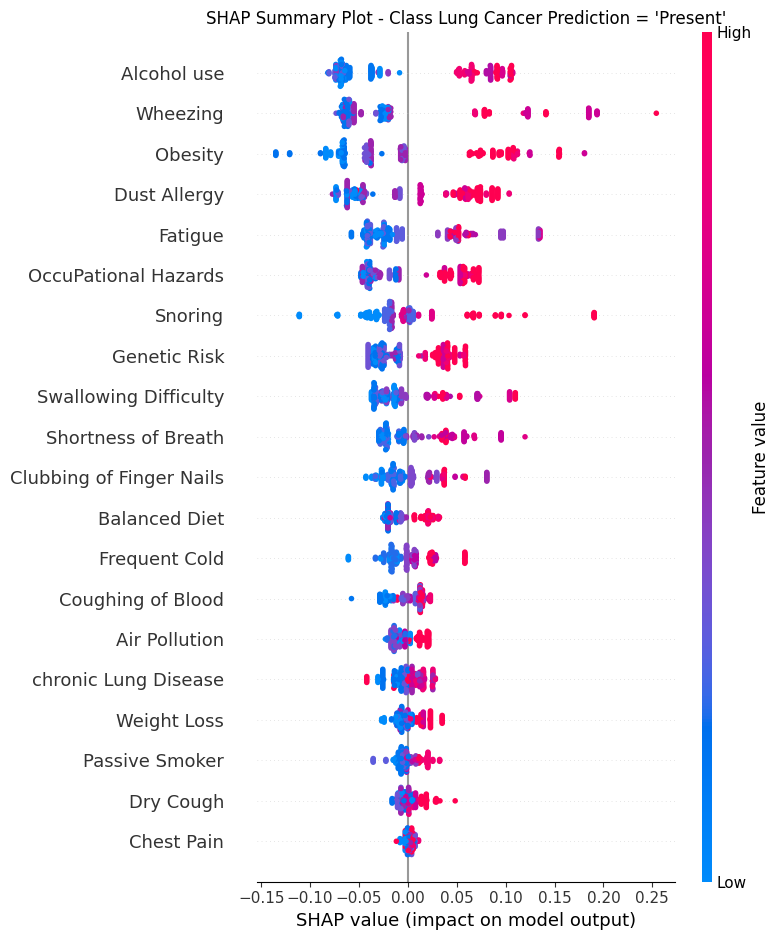

In [38]:
class_to_explain = 1
plt.title("SHAP Summary Plot - Class Lung Cancer Prediction = 'Present'")
shap.summary_plot(shap_values[class_to_explain], X_test, feature_names=df.columns)

In [39]:
# class_to_explain = 2
# plt.title("SHAP Summary Plot - Class Lung Cancer Prediction = 'High'")
# shap.summary_plot(shap_values[class_to_explain], X_test, feature_names=df.columns)

Export Model

In [40]:
import pickle

# scikit-learn model = 'rf'
with open('model_filename.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)
    
with open('model_filename.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

predictions = loaded_model.predict(X_test)
print(predictions)

[0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0]


In [41]:
# from sklearn.inspection import permutation_importance

# # Calculate and plot feature importance using Permutation Importance
# result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# # Get feature importance scores and names
# feature_importance = result.importances_mean
# feature_names = X  # Replace with your actual feature names

# # Sort features based on importance
# sorted_idx = np.argsort(feature_importance)

# # Plot feature importance
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
# plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.title("Feature Importance")
# plt.show()

In [42]:
# import lime
# from lime.lime_tabular import LimeTabularExplainer
# from sklearn.calibration import CalibratedClassifierCV
# #import shap

# feature_names = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
#        'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
#        'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
#        'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
#        'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
#        'Frequent Cold', 'Dry Cough', 'Snoring']

# X_df = pd.DataFrame(X, columns=feature_names)
# explainer_lime = LimeTabularExplainer(X_df.values, feature_names=feature_names, mode="classification", discretize_continuous=True)

# calibrated_model = CalibratedClassifierCV(rf, method='sigmoid', cv='prefit')
# calibrated_model.fit(X_train, y_train)
# instance = 108     # instance = index of the sample input we want to explain
# lime_explanation = explainer_lime.explain_instance(X_test[instance], calibrated_model.predict_proba, num_features=5, top_labels=3)

# print("LIME Explanation:")
# lime_explanation.show_in_notebook()

In [43]:
# lime_explanations = []  # To store explanations for each class
# #class_names = ['Low', 'Medium', 'High']  # Replace with your class names in the order of prediction


# for label in lime_explanation.top_labels:
#     exp = lime_explanation.as_list(label=label)
#     lime_explanations.append(exp)

# class_mapping = {
#     0: 'Low',   # Example mappings, replace with your classes
#     1: 'Medium',
#     2: 'High'
#     # Add more mappings if needed
# }

# # Plotting the explanations for top predicted classes in a single graph
# import matplotlib.pyplot as plt

# # Initialize the plot
# plt.figure(figsize=(10, 6))
# plt.title("Top Predicted Classes Explanations")

# # Plotting the explanations for each class
# colors = ['r', 'g', 'b']  # Colors for each class
# for instance, exp in enumerate(lime_explanations):
#     labels, vals = zip(*exp)
#     class_label = class_mapping[lime_explanation.top_labels[instance]]
#     #plt.barh(labels, vals, color=colors[instance], alpha=0.6, label=f"Class {lime_explanation.top_labels[instance]}")
#     #plt.barh(labels, vals, color=colors[instance], alpha=0.6, label=class_names[lime_explanation.top_labels[instance]])
#     plt.barh(labels, vals, color=colors[instance], alpha=0.6, label=class_label)


# # Display legends, labels, and show the plot
# plt.legend()
# plt.xlabel('Feature Contribution')
# plt.ylabel('Features')
# plt.tight_layout()
# plt.show()


In [44]:
# lime_explanation.as_list()

In [45]:
# lime_explanation.as_pyplot_figure()